# Essential Statistics

A grounding in statistics is vital to the modern materials scientist. There are many areas in which you are likely to come across distributed data that describe some feature or property of a material. In order to fully understand and interpret that data there are several key tools that you should have at your disposal. In this week's notebook, we will look at probability distribution functions such as the normal (or Gaussian), log-normal, beta and gamma distributions. We shall discuss the differences between probability and cumulative distribution functions and we shall carry out some hypothesis testing as well as investigating the types of error that can occur in this process.

## Probability Distribution Functions

Probability distribution functions are mathematical functions that describe the probability of an outcome occurring. Depending upon the context, we will either refer to _probability density functions_, or _cumulative distribution functions_. Broadly speaking, a probility density function $f(x)$ gives the relative likelihood of a random variable $X$ taking a given value $x$, whereas a cumulative distribution function $F(x)$ gives the probability that $X$ takes a value _less than or equal to_ $x$. For example, $F(x)$ might tell us the probability that the area of a randomly selected grain (which we would call $X$) in a micrograph of a steel sample is less than or equal to $x$ $\mu$m$^2$.

### Probability density functions

We shall start by introducing some common distributions via their probability density functions.  A property of all probability density functions $f(x)$ is that if you integrate them from negative to positive infinity you must get one:

$$\int_{-\infty}^\infty f(x)~dx=1,$$

and if you want to know the probability that your variable takes a value between $a$ and $b$, you simply integrate the probability density function over the range $[a,b]$:

$$Pr~(a\le X\le b)=\int_a^b f(x)~dx.$$

There is a huge number of probability distribution functions, each of which has its own set of properties and potential applications. In this notebook we will cover just a small selection to give some examples of the different types and shapes of distribution you might come across.

#### The normal (or Gaussian) distribution

The normal distribution is the most common distribution you will come across. Its probability density function is given by

$$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right),$$

where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation. It can be plotted as follows:

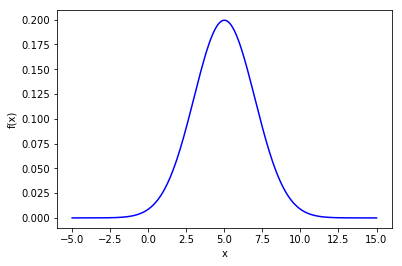

In [1]:
import numpy as np #import numpy package as np
import matplotlib.pyplot as plt #import pyplot from matplotlib as plt

def NormalPDF(x,m,s): #NormalPDF is a function of x and has parameters m and s
    return np.exp(-(x-m)**2/(2*s**2))/(2*np.pi*s**2)**0.5 #define the normal distribution probability density function

x=np.linspace(-5,15,501) #define a set of x values
y=NormalPDF(x,5,2) #calculate the corresponding set of y values

%matplotlib inline 
#define where plots will appear
plt.plot(x,y,'-b') #plot normal probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

The normal distribution is useful for modelling variables that can be both positive and negative, it has a characteristic bell shape. Examples of variables in materials science that can be approximately normally distributed include: errors in measurements, the X-ray photoelectron energy spectra produced by a synchrotron and the residuals obtained in regression.

#### <span style="color: red"> Task 1:</span> Plot a few different normal distributions on the same axes.

Use a legend to display which parameter values you have used in each plot.

Describe how $\mu$ and $\sigma$ affect the shape of the distribution.

The figure you obtain should look something like this:
<figure>
<img src="Figures/03_T1.jpeg" width='400'>
</figure>

##### SciPy implementation

The normal distribution is also implemented in the <code>scipy.stats</code> package via the command <code>scipy.stats.norm</code>. If you look up the [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.norm.html) for this command, you will see that it can be used as a function of either one or three variables. 

As the documentation explains, the version with one variable can be described by the equation

$$f(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right),$$

which is equivalent to setting $\mu=0$ and $\sigma=1$ in the standard definition of the normal distribution given above. The three parameter version replaces $f(x)$ with $f((x-l)/s)/s$ to give

$$f(x)=\frac{1}{\sqrt{2\pi s^2}}\exp\left(-\frac{(x-l)^2}{2s^2}\right),$$

where $l$ and $s$ are called the location and scale parameters respectively ($l$ and $s$ are called <code>loc</code> and <code>scale</code>, repsectively in the documentation). This equation is equivalent to the definition we gave above, but with $\mu=l$ and $\sigma=s$. Therefore, we can interpret the location and scale parameters for this distribution as the mean and standard deviation, respectively.

Here we plot a normal distribution with $\mu=5$ and $\sigma=2$ using the <code>scipy.stats</code> package:

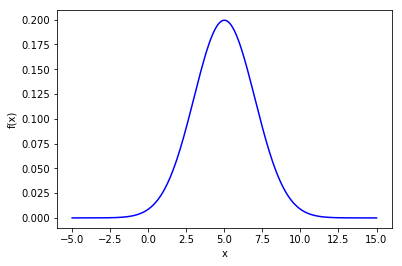

In [3]:
from scipy import stats #import the scipy stats package

sy=stats.norm.pdf(x,5,2) #calculate the y values

plt.plot(x,sy,'-b') #plot normal probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

#### The log-normal distribution

This type of distribution describes a variable whose logarithm is normally distributed. The associated probability density function is:

$$f(x)=\frac{1}{x}\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(\log x-\mu)^2}{2\sigma^2}\right),$$

where $\mu$ and $\sigma$ are the mean and standard deviation of the logarithm of $x$, respectively. It can be plotted as follows:

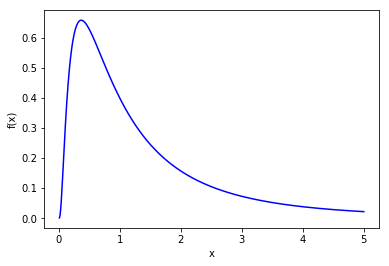

In [4]:
def LogNormalPDF(x,m,s): #LogNormalPDF is a function of x and has parameters m and s
    return np.exp(-(np.log(x)-m)**2/(2*s**2))/x/s/(2*np.pi)**0.5 #define the log-normal distribution probability density function

xLN=np.linspace(0.01,5,500) #define a set of x values. 
#Note that we have excluded the point $x=0$ since the log-normal distribution is not defined there
yLN=LogNormalPDF(xLN,0,1) #calculate the corresponding set of y values

plt.plot(xLN,yLN,'-b') #plot log-normal probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)');#label vertical axis

Note that this distribution is only defined over the range $(0,\infty)$ and so is suitable for modelling variables that must be positive, but have no theoretical upper limit. An example of such a variable would be the length of the cracks that form in a brittle material that is subjected to a tensile test - there is no such thing as a negative length!

#### <span style="color: red"> Task 2:</span> Plot a few different log-normal distributions on the same axes.

Use a legend to display which parameter values you have used in each plot.

Describe how $\mu$ and $\sigma$ affect the shape of the distribution.

The figure you obtain should look something like this:
<figure>
<img src="Figures/03_T2.jpeg" width='400'>
</figure>

##### SciPy implementation

The log-normal distribution is also implemented in the <code>scipy.stats</code> package via the command <code>scipy.stats.lognorm</code>. If you look up the [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.lognorm.html) for this command, you will see that it can be used as a function of either two or four variables. 

As the documentation explains, the version with two variables can be described by the equation

$$f(x)=\frac{1}{x}\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(\log x)^2}{2\sigma^2}\right),$$

which is equivalent to setting $\mu=0$ in the standard definition of the log-normal distribution given above ($\sigma$ is called <code>s</code> in the documentation). As with the normal distribution, the four parameter version replaces $f(x)$ with $f((x-l)/s)/s$ to give

$$f(x)=\frac{1}{x-l}\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(\log((x-l)/s))^2}{2\sigma^2}\right),$$

where, again, $l$ and $s$ are called the location and scale parameters respectively ($l$ and $s$ are called <code>loc</code> and <code>scale</code>, repsectively in the documentation). This equation is equivalent to the definition we gave above only if $l=0$ and with $s=e^{~\mu}$. The additional parameter $l$ allows you to shift the distribution left or right which means that it will be defined over the range $(l,\infty)$ rather than $(0,\infty)$.

Here we plot a log-normal distribution with $\mu=1$ and $\sigma=3/2$ using the <code>scipy.stats</code> package:

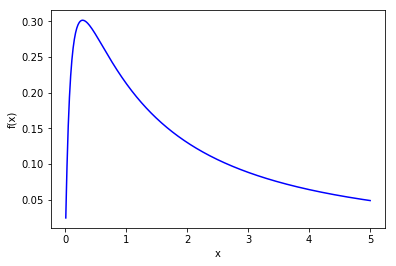

In [6]:
syLN=stats.lognorm.pdf(xLN,3/2,0,np.exp(1)) #calculate the y values

plt.plot(xLN,syLN,'-b') #plot normal probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

#### The beta distribution

The next type of distribution we shall consider is called the beta distribution, whose probability density function is

$$f(x)=\frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1},$$

where $\alpha$ and $\beta$ are called the _shape parameters_ of the distribution and must both be greater than one. They do not have as obvious an interpretation as the parameters of the normal and log-normal distributions. $B(\alpha,\beta)$ is a special function called a beta function, if you have not heard of it, look it up! Here is a plot of the beta distribution:

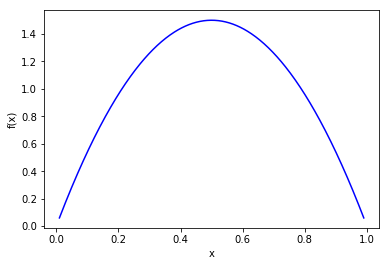

In [7]:
import scipy.special as sp #we need to import the SciPy special functions to use the beta function

def BetaPDF(x,a,b): #BetaPDF is a function of x and has parameters a and b
    return x**(a-1)*(1-x)**(b-1)/sp.beta(a,b) #define the beta distribution probability density function

xB=np.linspace(0.01,0.99,499) #define a set of x values. Note we have excluded the points 0 and 1, since for certain values of alpha and beta, the distribution is not defined at these points
yB=BetaPDF(xB,2,2) #calculate the corresponding set of y values

plt.plot(xB,yB,'-b') #plot beta probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

Note that this distribution is only defined over the range $(0,1)$, therefore it is useful for modelling variables that are bounded from both below and above. It can be used to describe the crimp distribution of collagen fibrils in soft tissues.

#### <span style="color: red"> Task 3:</span> Plot a few different beta distributions on the same axes.

Use a legend to display which parameter values you have used in each plot.

Describe how $\alpha$ and $\beta$ affect the shape of the distribution.

The figure you obtain should look something like this:
<figure>
<img src="Figures/03_T3.jpeg" width='400'>
</figure>

Note that in the figure above we have used $a$ and $b$ as our plot labels rather than $\alpha$ and $\beta$.

##### SciPy implementation

The beta distribution is also implemented in the <code>scipy.stats</code> package via the command <code>scipy.stats.beta</code>. If you look up the [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.beta.html) for this command, you will see that it can be used as a function of either three or five variables.

As the documentation explains, the version with three variables can be described by the equation

$$f(x)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1},$$

where $\Gamma$ is the gamma function (another special function - don't worry if you haven't heard of it - feel free to look it up!) and $\alpha$ and $\beta$ are called <code>a</code> and <code>b</code>, respectively, in the documentation. This definition is entirely equivalent to that given above due to the fact that 

$$B(\alpha,\beta)=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)},$$

therefore, we will stick with using the three variable version in this notebook. The five variable version introduces scale and location parameters in order to shift and stretch the range of the distribution if necessary.

Here we plot a beta distribution with $\alpha=2$ and $\beta=3$ using the <code>scipy.stats</code> package:

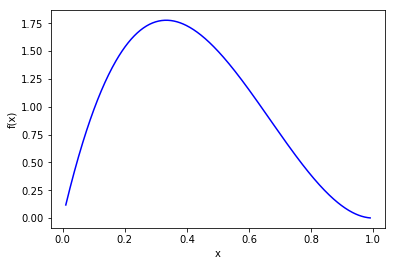

In [9]:
syB=stats.beta.pdf(xB,2,3) #calculate the y values

plt.plot(xB,syB,'-b') #plot normal probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

#### The gamma distribution

The final distribution we are going to introduce in this notebook is the gamma distribution, whose probability density function is

$$f(x)=\frac{x^{k-1}e^{-x/\theta}}{\theta^k\Gamma(k)},$$

where $k$ is called the shape parameter and $\theta$ is called the scale parameter. Both $k$ and $\theta$ must be strictly positive. The gamma distribution can be plotted as follows:

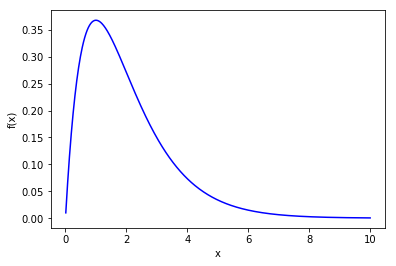

In [10]:
def GammaPDF(x,k,t): #GammaPDF is a function of x and has parameters k and t
    return x**(k-1)*np.exp(-x/t)/t**k/sp.gamma(k) #define the beta distribution probability density function

xG=np.linspace(0,10,500) #define a set of x values
yG=GammaPDF(xG,2,1) #calculate the corresponding set of y values

plt.plot(xG,yG,'-b') #plot gamma probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

The gamma distribution has some nice properties:

a) For large $k$, it gets close to looking like a normal distribution:

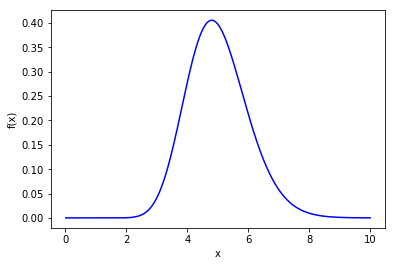

In [11]:
xG=np.linspace(0,10,500) #define a set of x values
yG=GammaPDF(xG,25,0.2) #calculate the corresponding set of y values

plt.plot(xG,yG,'-b') #plot gamma probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

b) When $k=1$, it becomes an exponential distribution, which is a distribution with probability density function $f(x)=\lambda e^{-\lambda x}$:

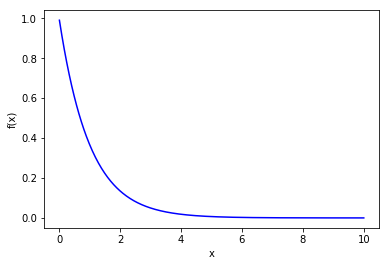

In [12]:
xG=np.linspace(0,10,500) #define a set of x values
yG=GammaPDF(xG,1,1) #calculate the corresponding set of y values

plt.plot(xG,yG,'-b') #plot gamma probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

c) When $\theta=2$, it becomes a chi-squared distribution - a distribution with probability density function $f(x)=\dfrac{x^{k-1}e^{-x/2}}{2^k\Gamma(k)}$:

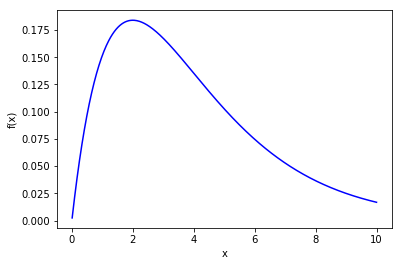

In [13]:
xG=np.linspace(0,10,500) #define a set of x values
yG=GammaPDF(xG,2,2) #calculate the corresponding set of y values

plt.plot(xG,yG,'-b') #plot gamma probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

It is, therefore, a very flexible distribution which can be used to fit data of a very wide variety, provided the variable it is modelling has to be positive. Examples of quantities that can be described well by a gamma distribution include the volumes of grains in samples of steel and the areas and perimeters of voids arising in two-dimensional electrospun polymer fibre networks.

##### SciPy implementation

The gamma distribution is also implemented in the <code>scipy.stats</code> package via the command <code>scipy.stats.gamma</code>. If you look up the [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.gamma.html) for this command, you will see that it can be used as a function of either two or four variables.

As the documentation explains, the version with two variables can be described by the equation

$$f(x)=\frac{x^{k-1}e^{-x}}{\Gamma(k)},$$

which is equivalent to setting $\theta=1$ in the definition of the gamma distribution given above ($k$ is called <code>a</code> in the documentation). As with the previous distributions, the four parameter version replaces $f(x)$ with $f((x-l)/s)/s$ to give

$$f(x)=\frac{(x-l)^{k-1}e^{-(x-l)/s}}{s^k\Gamma(k)},$$

where, again, $l$ and $s$ are called the location and scale parameters respectively ($l$ and $s$ are called <code>loc</code> and <code>scale</code>, repsectively in the documentation). This equation is equivalent to the definition we gave above only if $l=0$ and with $s=\theta$. The additional parameter $l$ allows you to shift the distribution left or right which means that it will be defined over the range $(l,\infty)$ rather than $(0,\infty)$.

Here we plot a gamma distribution with $k=2$ and $\theta=1$ using the <code>scipy.stats</code> package:

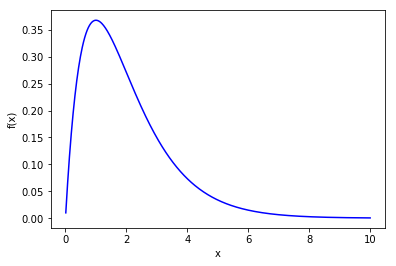

In [14]:
syG=stats.gamma.pdf(xG,2,0,1) #calculate the corresponding set of y values

plt.plot(xG,syG,'-b') #plot gamma probability density function
plt.xlabel('x') #label horizontal axis
plt.ylabel('f(x)'); #label vertical axis

### Fitting probability density functions to data

#### Fitting a normal distribution

It is often of interest to fit a probability density function directly to some data. For example, imagine we wanted to predict the stress-strain behaviour of a fibrous material without having to physically test it (and risk damaging the material). If we knew the Young's modulus of the individual fibres, we could instead image the material (for example via scanning electron miscroscopy) to determine how the fibres were oriented within it and fit a probability distribution function to the orientation data. Once we had this data we could mathematically model how the material would behave under unixial extension in order to predict what its stress-strain curve would look like. Without a distribution function to describe the orientation, however, this would be impossible. 

Similarly, other local and distributed properties (such as the local mass density) can affect a material's mechanical properties, so we may wish to fit probability distribution functions to those too. The file <code>Sample7.dat</code> in the Data folder contains a 512 x 512 array of data that represent the local average mass densities in grammes per metre squared (g/m$^2$) of a square region of heterogeneous fibrous material of side length 100 $\mu$m. We can visualise these data in an image as follows:

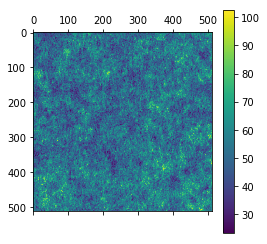

In [15]:
MassDensityData = np.loadtxt('Data/Sample7.dat') 
#create an array called MassDensityData that contains the data from the file Sample7.dat
plt.matshow(MassDensityData) #plot the data as a heat map
plt.colorbar(); #include a key showing what values each colour represents

As mentioned above, these data are given as an array. In order to carry out a statistical analysis of this data set, we need to convert it into a list. We can do this using the <code>itertools.chain</code> tool:

In [16]:
import itertools #import itertools
merged=list(itertools.chain(*MassDensityData)) #create a list called merged containing all the entries of the array

Once the data has been merged, we can plot it as a histogram:

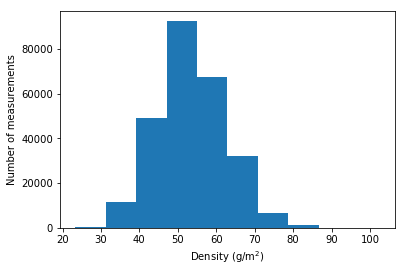

In [17]:
plt.hist(merged) #plot merged as a histogram
plt.xlabel('Density (g/m$^2$)') #label horizontal axis
plt.ylabel('Number of measurements'); #label vertical axis

It is often informative to try plotting the data using different numbers of bins. After trying a few different options, I settled on using 40 bins below:

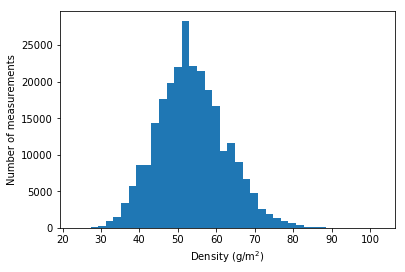

In [18]:
plt.hist(merged,40) #plot merged as a histogram using 40 bins
plt.xlabel('Density (g/m$^2$)') #label horizontal axis
plt.ylabel('Number of measurements'); #label vertical axis

Note that the vertical axis gives the number of measurements in each bin. In order to fit a probability density function to this data, we need to convert this information into probability density format:

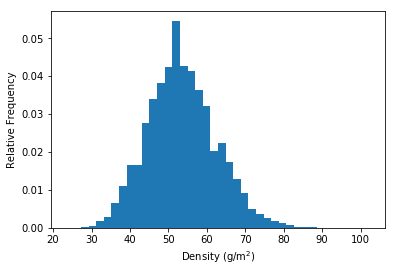

In [19]:
plt.hist(merged,40,normed=True) #use the normed option to express the data as a probability density
plt.xlabel('Density (g/m$^2$)') #label horizontal axis
plt.ylabel('Relative Frequency Density'); #label vertical axis;

Then we can fit a normal distribution to the data:

The fitted distribution parameters are mu = 53.6 and sigma = 8.98


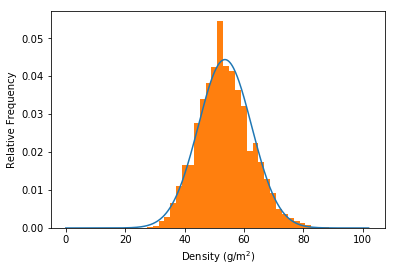

In [20]:
from scipy.stats import norm #import norm from scipy.stats

mu, sigma = norm.fit(merged) #fit a normal distribution to the data and calculate the values of mu and sigma

x = np.linspace(0,102,501) #create an array of x values to use when plotting the distribution

plt.plot(x, norm.pdf(x,mu,sigma)) #plot the fitted distribution
plt.hist(merged,40,normed=True) #plot the histogram of the data
plt.xlabel('Density (g/m$^2$)') #label horizontal axis
plt.ylabel('Relative Frequency Density'); #label vertical axis;
print('The fitted distribution parameters are mu =',"%.3g" %mu,'and sigma =',"%.3g" %sigma)

##### Normal probability plots

One way to visually inspect how good your normal distribution fit is is to use a normal probability plot. A perfect normal distribution would appear as a straight diagonal line on a normal probability plot. The worse the fit is, the further from the diagonal the points will appear. 

Here is a normal probability plot for the <code>Sample7.dat</code> data:

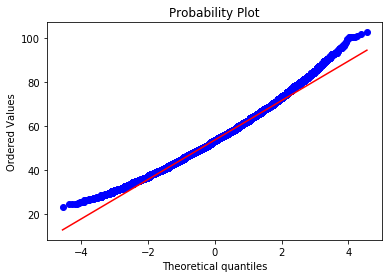

In [21]:
stats.probplot(merged, plot=plt); #plot a normal probability plot for merged

A large sample from a population that is normally distributed gives a near-perfect straight line:

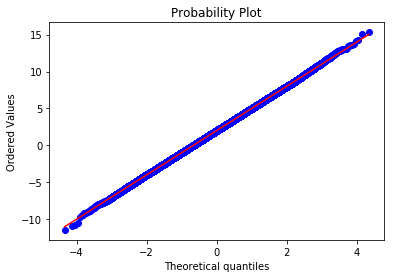

In [22]:
sample = np.random.normal(2,3,100000) #a sample of size 100,000 from a normal distribution with mean=2 and standard deviation=3
stats.probplot(sample, plot=plt); #plot a normal probability plot for sample

#### <span style="color: red"> Task 4:</span> Fit a normal distribution to the data in the file Sample5.dat

<code>Sample5.dat</code> contains another 512 x 512 array of data that represent the local average mass densities in grammes per metre squared (g/m$^2$) of a square region of a different sample of heterogeneous fibrous material.

Visualise this data in a plot before fitting the distribution to it.

Print the fitted distribution parameter values and provide a normal probability plot for the data.

The figures you obtain should look like this:
<figure>
<img src="Figures/03_T4_a.jpeg" width='400'>
<img src="Figures/03_T4_b.jpeg" width='400'>
<img src="Figures/03_T4_c.jpeg" width='400'>
</figure>

#### Fitting other distributions

Maybe we can obtain a better fit with a different distribution. Below, we fit a log-normal distribution to the <code>Sample7.dat</code> data. This is a sensible choice since we know there is no such thing as a negative density.

Note 1: Be patient, this code may take some time to run - you will see <code>In [*]</code> displayed to the left whilst the code is running.

Note 2: We have set the location parameter to equal zero below since we want to use the usual definition of the log-normal distribution.

Note 3: When printing the distribution parameters, we have to take the logarithm of $s$ since we know that $s=e^\mu\Rightarrow\mu=\log(s)$.

The fitted distribution parameters are mu = 3.97 and sigma = 0.169


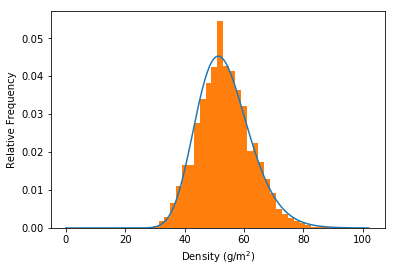

In [26]:
from scipy.stats import lognorm #import lognorm from scipy.stats

sigma, l, s = lognorm.fit(merged, floc=0) #fit a lognormal distribution to the data and calculate the values of sigma, l and s
plt.plot(x, lognorm.pdf(x,sigma,l,s)) #plot the fitted distribution
plt.hist(merged,40,normed=True) #plot the histogram of the data
plt.xlabel('Density (g/m$^2$)') #label horizontal axis
plt.ylabel('Relative Frequency Density'); #label vertical axis;
print('The fitted distribution parameters are mu =',"%.3g" %np.log(s),'and sigma =',"%.3g" %sigma)

#### <span style="color: red"> Task 5:</span> Try fitting a gamma distribution to the data in the file Sample5.dat

Hint: You will need to set the location parameter to be zero in order to use the standard gamma distribution.

The figure you obtain should look like this:
<figure>
<img src="Figures/03_T5.jpeg" width='400'>
</figure>

### Cumulative distribution functions

As mentioned above, a cumulative distribution function $F(x)$ gives the probability that a random variable $X$ takes a value less than or equal to $x$. They can be calculated by integrating the expression for the corresponding probability density function:

$$F(x)= \int_{-\infty}^x f(t)~dt, $$

and they must tend to one as $x$ tends to infinity:

$$\lim_{x\rightarrow\infty}F(x)=1.$$

When we integrate the probability density functions considered above, we get the following cumulative distribution functions. As we shall see below, cumulative distribution functions are useful for fitting data that has been pre-binned.

#### Normal distribution

The normal cumulative distribution function is

$$F(x) =\frac{1}{2}\left(1+\text{erf}\left(\frac{x-\mu}{\sqrt{2\sigma^2}}\right)\right),$$

where $\text{erf}$ is a special function called the error function.

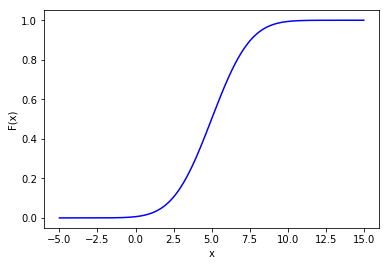

In [28]:
x3=np.linspace(-5,15,501) #define a set of x values
syCDF=stats.norm.cdf(x3,5,2) #calculate the y values
plt.plot(x3,syCDF,'-b') #plot normal cumulative distribution function
plt.xlabel('x') #label horizontal axis
plt.ylabel('F(x)'); #label vertical axis

We can plot the normal distribution fit to the <code>Sample7.dat</code> mass density data from above in cumulative form as follows:

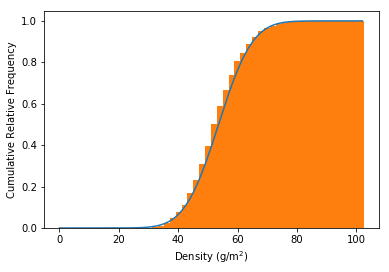

In [29]:
mu, sigma = norm.fit(merged) #fit a normal distribution to the data and calculate the values of mu and sigma
plt.plot(x, norm.cdf(x,mu,sigma)) #plot the fitted distribution
plt.hist(merged,40,normed=True,cumulative=1) #plot the histogram of the data
plt.xlabel('Density (g/m$^2$)') #label horizontal axis
plt.ylabel('Cumulative Relative Frequency'); #label vertical axis;

#### <span style="color: red"> Task 6:</span> Plot your normal distribution fit to the Sample5.dat data in cumulative form

The figure you obtain should look like this:
<figure>
<img src="Figures/03_T6.jpeg" width='400'>
</figure>

#### Log-normal distribution

The log-normal distribution's cumulative distribution function is

$$F(x)=\frac{1}{2}\left(1+\text{erf}\left(\frac{\log x-\mu}{\sqrt{2\sigma^2}}\right)\right)$$

We can plot the log-normal distribution fit to the <code>Sample7.dat</code> mass density data from above in cumulative form as follows.

Note: Again, you will need to be patient when running the code below.

The fitted distribution parameters are mu = 53.6 and sigma = 0.169


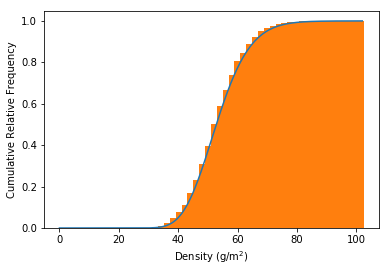

In [31]:
sigma, l, s = lognorm.fit(merged, floc=0) #fit a lognormal distribution to the data and calculate the values of sigma, l and s
plt.plot(x, lognorm.cdf(x,sigma,l,s)) #plot the fitted distribution
plt.hist(merged,40,normed=True,cumulative=1) #plot the histogram of the data
plt.xlabel('Density (g/m$^2$)') #label horizontal axis
plt.ylabel('Cumulative Relative Frequency'); #label vertical axis;
print('The fitted distribution parameters are mu =',"%.3g" %mu,'and sigma =',"%.3g" %sigma)

#### Beta distribution

The beta distribution's cumulative distribution function is

$$F(x)=I_x(\alpha,\beta),$$

where $I_x$ is a special function called the regularised incomplete beta function.

#### Gamma distribution

The gamma distribution's cumulative distribution function is

$$F(x)=\frac{1}{\Gamma(k)}\gamma\left(k,\frac{x}{\theta}\right),$$

where $\gamma$ is a special function called the lower incomplete gamma function.

#### <span style="color: red"> Task 7:</span> Plot your gamma distribution fit to the Sample5.dat data in cumulative form

The figure you obtain should look like this:
<figure>
<img src="Figures/03_T7.jpeg" width='400'>
</figure>

#### Making use of the cumulative distribution function

One of the most useful applications of the cumulative distribution is to quickly report what percentage of your oberservations took a value less than or equal to a prescribed number. For example, if we wanted to know what percentage of our fibrous material had a density less than or equal to 60 g/mm$^2$, we could simply plug the number 60 into one of our fitted cumulative distribution functions: 

In [33]:
print("%.3g" %(100*lognorm.cdf(60,sigma,l,s)),'% of the fibrous material described by the file Sample7.dat has a density of less than or equal to 60 g/mm^2')

77.4 % of the fibrous material described by the file Sample7.dat has a density of less than or equal to 60 g/mm^2


#### Fitting pre-binned data

Sometimes you will need to work with data that has already been sorted into bins. Below, we demonstrate how to fit a cumulative distribution function to pre-binned data.

The file <code>Tensile10.txt</code> contains some data on the cracks that appeared in a steel sample that had been submerged in boiling, concentrated magnesium chloride solution for 10 hours and subsequently subjected to a tensile test. Take a look at the file in a text editor. The first column gives the left side of each bin in microns, the second, the right side and the third, the mid-point; the fourth column gives the numbers of measured cracks that had a length within the corresponding bin. This data is plotted below using the right side of each bin for the horizontal axis data (it is important to use the right side of the bin when fitting a cumulative distribution function):

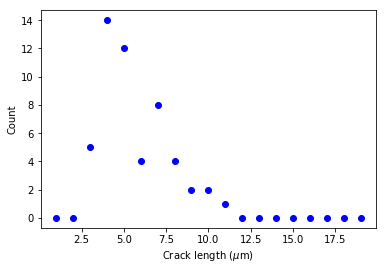

In [34]:
Tensile10 = np.loadtxt('Data/Tensile10.txt', skiprows=1) 
#create an array called Tensile10 that contains the data from the file Tensile10.txt
plt.plot(Tensile10[:,1],Tensile10[:,3],'bo')
plt.xlabel('Crack length ($\mu$m)') #label horizontal axis
plt.ylabel('Count'); #label vertical axis;

To convert this into a format suitable for fitting with a cumulative distribution function, we need to convert the counts into relative frequencies. We do this by summing all the entries from the counts column, then dividing each individual count by the total:

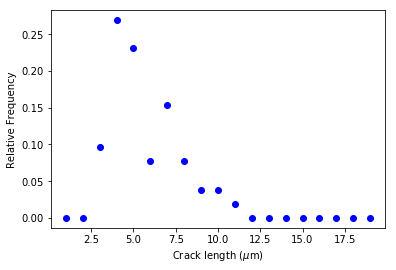

In [35]:
Tensile10Freq=Tensile10[:,3]/sum(Tensile10[:,3]) #convert the data into relative frequency form
plt.plot(Tensile10[:,1],Tensile10Freq,'bo') #plot the data in relative frequency form
plt.xlabel('Crack length ($\mu$m)') #label horizontal axis
plt.ylabel('Relative Frequency'); #label vertical axis;

We then need to accumulate all of the data and create a list that gives the running total. This allows us to plot the cumulative relative freqency:

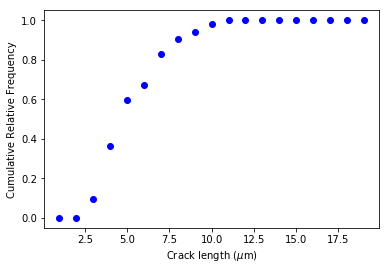

In [36]:
Tensile10CumFreq=np.cumsum(Tensile10Freq) #convert the data into cumulative relative frequency form
plt.plot(Tensile10[:,1],Tensile10CumFreq,'bo') #plot the data in cumulative relative frequency form
plt.xlabel('Crack length ($\mu$m)') #label horizontal axis
plt.ylabel('Cumulative Relative Frequency'); #label vertical axis;

Once the data has been presented in this form, we can simply use the <code>curve_fit</code> functionality we investigated last week to fit a cumulative density function to it. Let's fit a log-normal distribution to this data:

The fitted distribution has parameters mu = 1.55 and sigma = 0.404


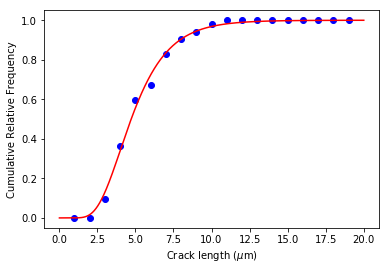

In [37]:
def LogNormalCDF(x,m,s): #LogNormalCDF is a function of x and has parameters m and s
    return (1/2)*(1+sp.erf((np.log(x)-m)/(2*s**2)**(1/2))) #define the log-normal cumulative distribution function

from scipy.optimize import curve_fit #import the curve_fit function from scipy.optimize
pars,cov=curve_fit(LogNormalCDF,Tensile10[:,1],Tensile10CumFreq) 
#use the curve_fit function to find the values of mu and sigma and the covariance matrix associated with the fitting process
mu=pars[0] #define mu
sigma=pars[1] #define sigma
x=np.linspace(0.01,20,1900) #create a list of x values to plot the fitted ditribution with
Tensile10Fit=LogNormalCDF(x,mu,sigma) #create a list containing data from our fitted function
plt.plot(Tensile10[:,1],Tensile10CumFreq,'bo') #plot initial data
plt.plot(x,Tensile10Fit,'-r') #plot fitted function
plt.xlabel('Crack length ($\mu$m)') #label horizontal axis
plt.ylabel('Cumulative Relative Frequency'); #label vertical axis;
print('The fitted distribution has parameters mu =',"%.3g" % mu,'and sigma =',"%.3g" % sigma) #print the fitted function

Once we have obtained our best fit parameters, $\mu$ and $\sigma$, we can use these values to plot the corresponding probability distribution function over the non-cumulative data. This time, we use the centres of the bins for the horizontal axis values:

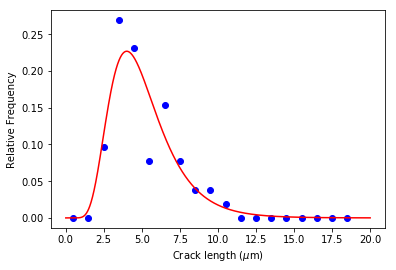

In [38]:
Tensile10PDFFit=LogNormalPDF(x,mu,sigma) #create a list containing data from our fitted function
plt.plot(Tensile10[:,2],Tensile10Freq,'bo') #plot initial data
plt.plot(x,Tensile10PDFFit,'-r') #plot fitted function
plt.xlabel('Crack length ($\mu$m)') #label horizontal axis
plt.ylabel('Relative Frequency'); #label vertical axis;

#### <span style="color: red"> Task 8:</span> Try fitting a normal cumulative distribution function to the data above.

Which distribution gives the better fit? 

Justify your answer with a quantitative statement (you may need to refer to last week's notebook for inspiration).

The figure you obtain should look like this:
<figure>
<img src="Figures/03_T8.jpeg" width='400'>
</figure>

## Hypothesis Testing

Hypothesis testing is a statistical technique that can be used to compare two data sets, or to compare a data set with the predictions of a model (for example we may wish to test the hypothesis that a data set is normally distributed by comparing the distribution of the data with a normal distribution that has been fitted to it).

In one of the examples above, we fitted a normal distribution to some mass density data on a heterogeneous fibrous material. A natural question to ask is: how good was that fit? To answer that question, we can carry out a hypothesis test.

### The Null Hypothesis

The null hypothesis is a general statement of the default position we might assume about the data we wish to apply hypothesis testing to. For example, the null hypothesis in the example mentioned above would be "The data is normally distributed". If we are to reject this statement, then we need evidence to do so.

### The Alternative Hypothesis

The alternative hypothesis is a statement that we wish to test against, in other words, the statement that we will accept if we decide to reject the null hypothesis. In the example above, our alternative hypothesis would be "The data is not normally distributed".

In Python, it is easy to test whether a data set is normally distributed. In the example below we test whether the mass density data from <code>Sample7.dat</code> is normally distributed.

In [41]:
k2, p = stats.normaltest(merged) #calculate the test statistic and p-value
alpha = 0.05 #set a threshold for accepting/rejecting the null hypothesis
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("The test statistic =",k2,"and the p-value =",p)

NormaltestResult(statistic=4932.6753736851833, pvalue=0.0)

The output of this test gives us two pieces of information: 1. the test statistic, which in this case equals 4932... and 2. the p-value, which in this case equals 0. Given our null hypothesis that the data is normally distributed, the p-value represents the probability that a test statistic (you don't need to worry about what the test statistic is, but feel free to look it up) that large (or larger) would be seen. The p-value always ranges between 0 and 1 and if it is very small, it is unlikely that the null hypothesis is true.

Therefore, in this case we reject the null hypothesis and accept the alternative hypothesis that the data is not normally distributed.

In the example below, we generate some normally distributed data, then test whether it is indeed normally distributed.

In [42]:
sample = np.random.normal(2,3,1000000) 
#a sample of size 1,000,000 from a normal distribution with mean=2 and standard deviation=3
k2, p = stats.normaltest(sample) #calculate the test statistic and p-value
alpha = 0.05 #set a threshold for accepting/rejecting the null hypothesis
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("The test statistic =",k2,"and the p-value =",p)

NormaltestResult(statistic=0.87010294833776336, pvalue=0.64723135052472858)

In this case, we (almost certainly) have a large p-value, so we do not reject the null hypothesis.

### Significance Levels

Typically, if the p-value is greater than 0.1, we will not reject the null hyopthesis. If the p-value is less than 0.1, we say 
_"the null hypothesis is rejected at the 10% significance level."_

If it is less than 0.05, we say
_"the null hypothesis is rejected at the 5% significance level."_

If it is less than 0.01, we say
_"the null hypothesis is rejected at the 1% significance level."_

The final of these is the strongest of the three statements, the first is the weakest.

In the mass density example presented above, we can therefore say
_"the null hypothesis that the data is normally distributed is rejected at the 1% significance level (p=0.0)."_

In the case of the data randomly generated from a normal distribution, we say
_"the null hypothesis that the data is normally distributed is not rejected at the 10% significance level (p=[INSERT P-VALUE HERE])"_

Note: you should always report the p-value you obtained as this gives the reader a quantitative understanding of how likely it is that your conclusions are correct.

#### <span style="color: red"> Task 9:</span> Test whether the data from Sample5.dat is normally distributed.

### Hypothesis testing for other distributions

To test whether data is distributed according to a different distribution (other than normal) we can use the command <code>stats.kstest</code>. Here we test whether the mass density data is distributed according to the log-normal distribution we fitted earlier.

Note: Again, you will need to be patient when running the code below.

In [44]:
sigma, l, s = lognorm.fit(merged, floc=0) #fit a log-normal distribution to the data and calculate the values of sigma, l and s
D, p = stats.kstest(merged,'lognorm',args=(sigma, l, s))
alpha = 0.01 #set a threshold for accepting/rejecting the null hypothesis
if p < alpha:  # null hypothesis: x comes from a log-normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("The test statistic =",D,"and the p-value =",p)

KstestResult(statistic=0.025560073431391994, pvalue=3.4969013159852892e-149)

Even though the fit may have looked good upon visual inspection, the hypothesis test tells us that the data is not in fact described well by a log-normal distribution:

_"The null hypothesis that the data is log-normally distributed is rejected at the 1% significance level (p<0.001)."_

In the example below, we generate some data from a log normal distribution, then test whether it is indeed distributed according to a log-normal distribution.

In [45]:
np.random.seed(1) #this line ensures that the same random data is always generated below so that the p-value does not change 
#each time you run this code
sample2 = np.random.lognormal(2,3,1000000) #a sample of size 1,000,000 from a log-normal distribution with mu=2 and sigma=3
D, p = stats.kstest(sample2,'lognorm',args=(3,0,np.exp(2))) 
#test whether sample is distributed according to a log-normal distribution
#remember that s=exp(mu) in the scipy implementation
alpha = 0.1 #set a threshold for accepting/rejecting the null hypothesis
if p < alpha:  # null hypothesis: x comes from a log-normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("The test statistic =",D,"and the p-value =",p)

KstestResult(statistic=0.00085031610203878394, pvalue=0.46483912487644186)

_"The null hypothesis that the data is log-normally distributed is not rejected at the 10% significance level (p=0.464)."_

#### <span style="color: red"> Task 10:</span> Test whether the data from Sample5.dat is distributed according to a gamma distribution.

### Testing whether two samples come from populations with the same mean

Hypothesis testing can also be used to determine whether samples come from populations with the same mean. In this case, our null hypotheis would be _"the means are equal"_ and the alternative hypothesis would be _"the means are not equal"_. For example, imagine you are working for an engineering company that makes wide use of steel in the structures it builds. They currently use a particular type of steel, which we will call Type A, but are considering switching to a different type of steel, which we will call Type B. Type B is signficantly cheaper, so the company would like to switch to this type, but they are not willing to accept any reduction in the ultimate tensile strength compared to the current type.

To compare the two types of steel, the company carries out 100 uniaxial tension tests to failure on samples of each type and records the ultimate tensile strength for each test (we simulate the results of these tests below by generating random numbers). Unfortunately, they find that the average ultimate tensile strength of Type B is only 1.7 GPa, compared to 1.8 GPa for Type A and are therefore considering rejecting Type B. You know, however, that this difference could just be down to random variation within the samples and that it is possible that the two populations the samples come from do in fact have the same mean (recall that in week 1 we investigated how sample means are distributed around the population mean). Therefore, we wish to test the null hypothesis that the two samples come from populations with means that are equal.

To carry out this test, we can either use the t-test for normally distributed data:

In [47]:
np.random.seed(25) #this line ensures that the same random data is always generated below so that the p-value does not change 
#each time you run this code
normalTypeA=np.random.normal(2,3,100) #randomly generate a sample of data from a normal distribution
normalTypeB=np.random.normal(2,3,100) #randomly generate a sample of data from a normal distribution
print('The mean ultimate tensile strength of the Type A sample is',"%.2g" %np.mean(normalTypeA), 'GPa')
print('The mean ultimate tensile strength of the Type B sample is',"%.2g" %np.mean(normalTypeB), 'GPa')
t, p = stats.ttest_ind(normalTypeA,normalTypeB) #apply the t-test to determine whether the two samples have identical means
alpha = 0.1 #set a threshold for accepting/rejecting the null hypothesis
if p < alpha:  # null hypothesis: the samples have identical means
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("The test statistic =",t,"and the p-value =",p)

The mean ultimate tensile strength of the Type A sample is 1.8 GPa
The mean ultimate tensile strength of the Type B sample is 1.7 GPa


Ttest_indResult(statistic=0.22000409224694137, pvalue=0.82609462889743646)

_"The null hypothesis that the means are equal is not rejected at the 10% significance level (p=0.826)"_

or the Mann-Whitney U test for data that is not normally distributed:

In [48]:
np.random.seed(14) #this line ensures that the same random data is always generated below so that the p-value does not change 
#each time you run this code
lognormalTypeA=np.random.lognormal(0.2,1,100) #randomly generate a sample of data from a log-normal distribution
lognormalTypeB=np.random.lognormal(0.2,1,100) #randomly generate a sample of data from a log-normal distribution
print('The mean ultimate tensile strength of the Type A sample is',"%.2g" %np.mean(lognormalTypeA), 'GPa')
print('The mean ultimate tensile strength of the Type B sample is',"%.2g" %np.mean(lognormalTypeB), 'GPa')
U, p = stats.mannwhitneyu(lognormalTypeA,lognormalTypeB) 
#apply the Mann-Whitney U test to determine whether the two samples have identical means
alpha = 0.1 #set a threshold for accepting/rejecting the null hypothesis
if p < alpha:  # null hypothesis: the samples have identical means
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("The test statistic =",U,"and the p-value =",p)

The mean ultimate tensile strength of the Type A sample is 1.8 GPa
The mean ultimate tensile strength of the Type B sample is 1.7 GPa


MannwhitneyuResult(statistic=4864.0, pvalue=0.37029233343041978)

_"The null hypothesis that the means are equal is not rejected at the 10% significance level (p=0.370)"_

You do not need to understand the details of how t-tests and Mann-Whitney U tests work, but feel free to look them up if you would like to know more.

As we can see, in both cases, the null hypothesis was not rejected; therefore, there is no statistically significant reason to assume that the two types of steel have different ultimate tensile strengths (in fact, in our example, the populations we randomly generated from do have the same mean of 2 GPa). We conclude that it may be sensible to carry out more testing before rejecting Type B.

If two samples are found to have different means at the 5% significance level, they are often described as "statistically significantly different". If they are found to have different means at the 1% significance level, they are often described as "statistically highly significantly different".

Let's imagine that the company are also considering switching to a third type, Type C, for applications that require a higher ultimate tensile strength. Type C is much more expensive, therefore they are only willing to make the switch if they can be highly confident that it performs better. You would need to see a very low p-value ($p<0.01$) and therefore a statistically highly significant difference in the means in order to recommend the switch to Type C in this case.

#### <span style="color: red"> Task 11:</span> Use hypothesis testing to determine whether the materials described by the files <code>Sample7.dat</code> and <code>Sample5.dat</code> have the same mean mass density.

Summarise your findings in a sentence.